In [1]:
##imports -- run first thing!
import numpy as np
from numpy import savetxt
import scipy as sp
from scipy import integrate
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [6]:
##clear files
open('func_epsilon.csv', 'w').close()
open('func_gamma.csv', 'w').close()
open('func_epsilon1.csv', 'w').close()
open('func_gamma1.csv', 'w').close()


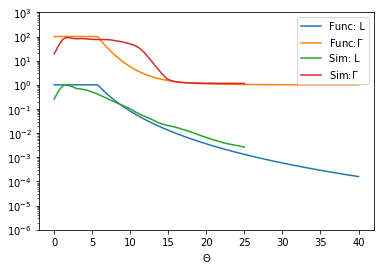

In [13]:
##### alpha-beta alignment to Sim Version: 1 #####
##declares
eps0 = 1.0
gam0 = 100.0
theta0 = 0.1 #radians
theta = 0.0 #radians
alpha = 4.5
beta = 5.5
eps_arr = np.array([])
gam_arr = np.array([])

##parameters
while (theta <= 0.69813):
    if theta <= theta0:
        epsTheta = eps0
        gamTheta = 1+(gam0-1)
    elif theta0 < theta:
        epsTheta = eps0*((theta/theta0)**(-1*alpha))
        gamTheta = 1+(gam0-1)*((theta/theta0)**(-1*beta))
    eps_arr_i = np.array([theta*180/np.pi,epsTheta])
    eps_arr = np.append(eps_arr, eps_arr_i, 0)
    gam_arr_i = np.array([theta*180/np.pi,gamTheta])
    gam_arr = np.append(gam_arr,gam_arr_i,0)
    theta = theta+0.001745
EpsilonTheta = eps_arr.reshape(401,2)
GammaTheta = gam_arr.reshape(401,2)
savetxt('func_epsilon_delta_45_theta_01deg.csv', EpsilonTheta, delimiter=',')
savetxt('func_gamma_delta_45_theta_01deg.csv', GammaTheta, delimiter=',')

##reads
Gtheta = pd.read_csv('GT0.csv', sep = ',', header = None, names = ['theta','gamma'])
Ltheta = pd.read_csv('LT0.csv', sep = ',', header = None, names = ['theta','L'])

##Plot
plt.yscale("log")
plt.ylim(0.000001,1000)
plt.xlabel('$\Theta}$')
x1 = EpsilonTheta[0:401,0]
y1 = EpsilonTheta[0:401,1]
plt.plot(x1,y1,label='Func: L')
x2 = GammaTheta[0:401,0]
y2 = GammaTheta[0:401,1]
plt.plot(x2,y2,label='Func:$ \Gamma$')
x3 = Ltheta['theta']
y3 = Ltheta['L']
plt.plot(x3,y3,label='Sim: L')
x4 = Gtheta['theta']
y4 = Gtheta['gamma']
plt.plot(x4,y4,label='Sim:$ \Gamma$')
plt.legend(loc="best")

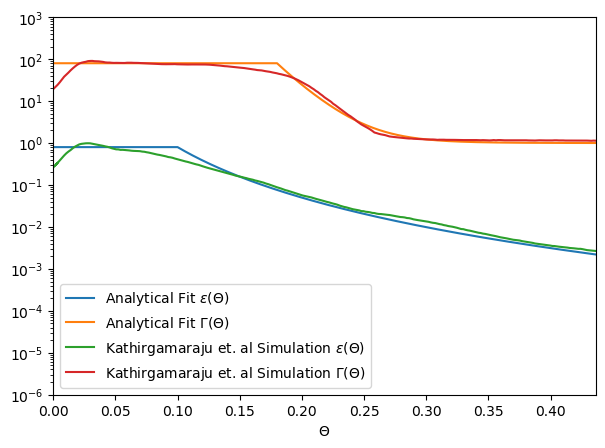

In [5]:
##### alpha-beta alignment to Sim Version: Just for Funsies #####
##clears
open('func_epsilonfit.csv', 'w').close()
open('func_gammafit.csv', 'w').close()
fig = plt.figure(figsize=(7,5), dpi=100)

##declares
eps0 = 0.8
gam0 = 80.0
theta0_E = 0.1 #radians
theta0_G = 0.18
theta = 0.0 #radians
alpha = 4.0
beta = 11.5
eps_arr = np.array([])
gam_arr = np.array([])

##parameters
while (theta <= 3.142):
    if theta <= theta0_E:
        epsTheta = eps0
    elif theta0_E < theta:
        epsTheta = eps0*((theta/theta0_E)**(-1*alpha))
    eps_arr_i = np.array([(180/np.pi)*theta,epsTheta])
    eps_arr = np.append(eps_arr, eps_arr_i, 0)
    theta = theta+0.001
EpsilonTheta = eps_arr.reshape(3143,2)
savetxt('func_epsilonfit.csv', EpsilonTheta, delimiter=',')
theta = 0.0
while (theta <= 3.142):
    if theta <= theta0_G: #2*theta0 extension just for lolz
        gamTheta = 1+(gam0-1)
    elif theta0_G < theta: #2*theta0 here too
        gamTheta = 1+(gam0-1)*((theta/theta0_G)**(-1*beta))
    gam_arr_i = np.array([(180/np.pi)*theta,gamTheta])
    gam_arr = np.append(gam_arr,gam_arr_i,0)
    theta = theta+0.001
GammaTheta = gam_arr.reshape(3143,2)
savetxt('func_gammafit.csv', GammaTheta, delimiter=',')

##reads
Gtheta = pd.read_csv('GT0.csv', sep = ',', header = None, names = ['theta','gamma'])
Ltheta = pd.read_csv('LT0.csv', sep = ',', header = None, names = ['theta','L'])

##Plot
plt.yscale("log")
#plt.xlim(0,25)
plt.ylim(0.000001,1000)
plt.xlim(0,0.436332313)
plt.xlabel('$\Theta$')
x1 = np.pi/180*EpsilonTheta[0:3143,0]
y1 = EpsilonTheta[0:3143,1]
plt.plot(x1,y1,label='Analytical Fit $\epsilon (\Theta)$')
x2 = np.pi/180*GammaTheta[0:3143,0]
y2 = GammaTheta[0:3143,1]
plt.plot(x2,y2,label='Analytical Fit $\Gamma (\Theta)$')
x3 = np.pi/180*Ltheta['theta']
y3 = Ltheta['L']
plt.plot(x3,y3,label='Kathirgamaraju et. al Simulation $\epsilon (\Theta)$')
x4 = np.pi/180*Gtheta['theta']
y4 = Gtheta['gamma']
plt.plot(x4,y4,label='Kathirgamaraju et. al Simulation $\Gamma (\Theta)$')
plt.legend(loc="best")

plt.savefig('2021fitparams.png')

L fit parameters: eps0=0.800, theta_0=4.344, alpha=2.840
G fit parameters: gamma_0=60.476, theta_0=10.991, beta=13.033


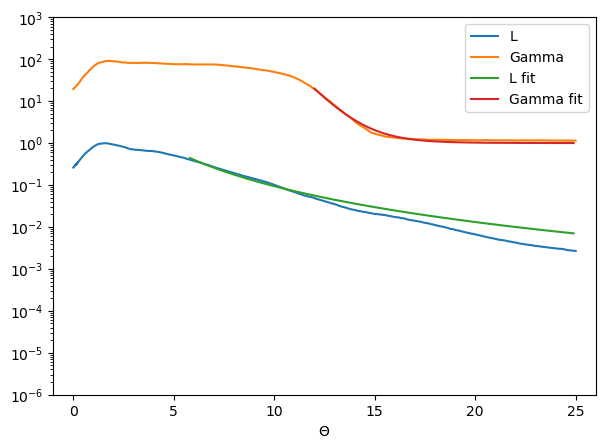

In [10]:
##### alpha-beta alignment to Sim Version #####
fig = plt.figure(figsize=(7,5), dpi=100)

##Reads and prelim plots
Gtheta = pd.read_csv('GT0.csv', sep = ',', header = None, names = ['theta','gamma'])
Ltheta = pd.read_csv('LT0.csv', sep = ',', header = None, names = ['theta','L'])
plt.plot(Ltheta['theta'], Ltheta['L'], label='L')
plt.plot(Gtheta['theta'], Gtheta['gamma'], label='Gamma')
plt.yscale("log")
plt.ylim(0.000001,1000)
plt.xlim(-1,26)
plt.xlabel('$\Theta$')

#Lumino fit
def lfit(thet, eps0, thet0, alph):
#    if (0 < thet < thet0):
#        lval = eps0*(thet/thet)
#    elif (thet >= thet0):
#        lval = eps0*(thet/thet0)**(-alph)
    return (thet/thet0)**(-alph)
#    return min(eps0, eps0*(thet/thet0)**(-alph))
(popt, pcov) = curve_fit(lfit, Ltheta['theta'][58:250], Ltheta['L'][58:250], p0=(0.8,5.7, 4.0), sigma=None, bounds=(0, np.inf))
plt.plot(Ltheta['theta'][58:250], lfit(Ltheta['theta'][58:250], popt[0], popt[1], popt[2]), label='L fit')
print(f"L fit parameters: eps0={popt[0]:.3f}, theta_0={popt[1]:.3f}, alpha={popt[2]:.3f}")

#Gamma fit
def gfit(thet, gam0, thet0, bet):
#    if (thet < thet0):
#        gval = gam0
#    elif (thet >= thet0):
#        gval = 1.0 + ((gam0-1)*(thet/thet0)**(-bet))
    return 1.0 + ((gam0-1)*(thet/thet0)**(-bet))
(popt, pcov) = curve_fit(gfit, Gtheta['theta'][120:250], Gtheta['gamma'][120:250], p0=(80.0, 10.31, 11.5), sigma=None, bounds=(0, np.inf))
plt.plot(Gtheta['theta'][120:250], gfit(Gtheta['theta'][120:250], popt[0], popt[1], popt[2]), label='Gamma fit')
print(f"G fit parameters: gamma_0={popt[0]:.3f}, theta_0={popt[1]:.3f}, beta={popt[2]:.3f}")

plt.legend()

In [16]:
##### Simulated Function #####
##declares
theta_o = 0.0
phi = 0.0
S_PT_arr = np.array([])
S_Lo_arr = np.array([])
S_obs_arr = np.array([])
gammas = [2.6]

##formula stuff
S_Gtheta = pd.read_csv('GT0.csv', sep = ',', header = None, names = ['theta','gamma'])
S_Ltheta = pd.read_csv('LT0.csv', sep = ',', header = None, names = ['theta','L'])
S_Btheta = np.sqrt(1-(1/((S_Gtheta['gamma'])**2)))

##theta max index calculator
for inmin in gammas:
    Gadjust = (S_Gtheta['gamma']-inmin)**2
    Gmin = np.where(Gadjust == Gadjust.min())
    GminFar = max(Gmin[0])+1
    theta_max = (int(GminFar)*0.1)
    
    ##theta observed selection and phi integral
    while (theta_o <= (41*np.pi/180)):
        ##phi selection and theta integral
        while (phi <= 2*np.pi):
            S_cosalph = (np.cos(theta_o)*np.cos(S_Ltheta['theta'][0:GminFar]*np.pi/180))+(np.sin(theta_o)*np.sin(S_Ltheta['theta'][0:GminFar]*np.pi/180)*np.cos(phi))
            S_num = S_Ltheta['L']*np.sin(S_Ltheta['theta'][0:GminFar]*np.pi/180)
            S_den = 4*np.pi*(S_Gtheta['gamma'][0:GminFar]**4)*((1-(S_Btheta*S_cosalph))**3)
            S_ans = (S_num/S_den)
            S_theta_int = sp.integrate.trapz(y = S_ans[0:GminFar], x = S_Ltheta['theta'][0:GminFar])
            S_PT_arr_i = np.array([(phi*180.0/np.pi), S_theta_int])
            S_PT_arr = np.append(S_PT_arr, S_PT_arr_i, 0)
            phi = phi+2*np.pi/72 #2*np.pi/n, count by 360/n degrees at a time
        S_PT = S_PT_arr.reshape(73,2) #shape(n rows, 2 columns), n = (phi n + 1) ↓↓ [0:n, a] is the same
        S_phi_int = sp.integrate.trapz(y = (S_PT[0:73, 1]), x = (S_PT[0:73,0]))
        S_Lo_arr_i = np.array([(theta_o*180.0/np.pi), S_phi_int])
        S_Lo_arr = np.append(S_Lo_arr, S_Lo_arr_i, 0)    
        theta_o = theta_o+(1*np.pi/180.0) #n*np.pi/180, count by n degrees at a time
        phi = 0
        S_PT_arr = np.array([])
    S_Lo = S_Lo_arr.reshape(41,2)
    S_Nval = max(S_Lo[0:41,1])
    S_LoN = S_Lo[0:41,1]/S_Nval
    
    
##### Math Function Try 2.14 #####
##declares
theta_o = 0.0
phi = 0.0
F_PT_arr = np.array([])
F_Lo_arr = np.array([])
F_obs_arr = np.array([])
gammas = [2.6]

##formula stuff
F_Gtheta = pd.read_csv('func_gamma2.csv', sep = ',', header = None, names = ['theta','gamma'])
F_Ltheta = pd.read_csv('func_epsilon2.csv', sep = ',', header = None, names = ['theta','L'])
F_Btheta = np.sqrt(1-(1/((F_Gtheta['gamma'])**2)))

##theta max index calculator
for inmin in gammas:
    Gadjust = (F_Gtheta['gamma']-inmin)**2
    Gmin = np.where(Gadjust == Gadjust.min())
    GminFar = max(Gmin[0])+1
    theta_max = (int(GminFar)*0.1)
    
    ##theta observed selection and phi integral
    while (theta_o <= (np.pi)):
        ##phi selection and theta integral
        while (phi <= 2*np.pi):
            F_cosalph = (np.cos(theta_o)*np.cos(F_Ltheta['theta'][0:GminFar]*np.pi/180))+(np.sin(theta_o)*np.sin(F_Ltheta['theta'][0:GminFar]*np.pi/180)*np.cos(phi))
            F_num = F_Ltheta['L']*np.sin(F_Ltheta['theta'][0:GminFar]*np.pi/180)
            F_den = 4*np.pi*(F_Gtheta['gamma'][0:GminFar]**4)*((1-(F_Btheta*F_cosalph))**3)
            F_ans = (F_num/F_den)
            F_theta_int = sp.integrate.trapz(y = F_ans[0:GminFar], x = F_Ltheta['theta'][0:GminFar])
            F_PT_arr_i = np.array([(phi*180.0/np.pi), F_theta_int])
            F_PT_arr = np.append(F_PT_arr, F_PT_arr_i, 0)
            phi = phi+2*np.pi/72
        F_PT = F_PT_arr.reshape(73,2)
        F_phi_int = sp.integrate.trapz(y = (F_PT[0:73, 1]), x = (F_PT[0:73,0]))
        F_Lo_arr_i = np.array([(theta_o*180.0/np.pi), F_phi_int])
        F_Lo_arr = np.append(F_Lo_arr, F_Lo_arr_i, 0)    
        theta_o = theta_o+(0.1*np.pi/180.0)
        phi = 0
        F_PT_arr = np.array([])
    F_Lo = F_Lo_arr.reshape(181,2)
    F_Nval = max(F_Lo[0:181,1])
    F_LoN = F_Lo[0:181,1]/F_Nval

    
##Graphing of Normalized Function
fig = plt.figure()
plt.ylabel('$L_{obs} / L_{peak}$')
plt.yscale("log")
#plt.xscale("log")
plt.ylim(.00001, 2)
#plt.xlim(0.6,180)
plt.xlim(0,40)
plt.xlabel('$\Theta_{obs}[^{\circ}]$')
F_x = F_Lo[0:181,0]
F_y = F_LoN[0:181]
plt.scatter(F_x,F_y,label='Function')
S_x = S_Lo[0:41,0]
S_y = S_LoN[0:41]
plt.scatter(S_x,S_y,label='Simulation')
plt.plot([0,50],[0.001,0.001],color='0.75', linestyle='dashed')
plt.plot([0,50],[0.0001,0.0001],color='0.75', linestyle='dashed')
plt.legend(loc="best")
#fig.suptitle('$\Gamma_{min}=$' + str(inmin))

KeyboardInterrupt: 

In [ ]:
##### Math Function Try 2.14 #####
##declares
theta_o = 0.0
phi = 0.0
F_PT_arr = np.array([])
F_Lo_arr = np.array([])
F_obs_arr = np.array([])
gammas = [2.6]

##formula stuff
F_Gtheta = pd.read_csv('func_gamma2.csv', sep = ',', header = None, names = ['theta','gamma'])
F_Ltheta = pd.read_csv('func_epsilon2.csv', sep = ',', header = None, names = ['theta','L'])
F_Btheta = np.sqrt(1-(1/((F_Gtheta['gamma'])**2)))

##theta max index calculator
for inmin in gammas:
    Gadjust = (F_Gtheta['gamma']-inmin)**2
    Gmin = np.where(Gadjust == Gadjust.min())
    GminFar = max(Gmin[0])+1
    theta_max = (int(GminFar)*0.1)
    
    ##theta observed selection and phi integral
    while (theta_o <= (np.pi)):
        ##phi selection and theta integral
        while (phi <= 2*np.pi):
            F_cosalph = (np.cos(theta_o)*np.cos(F_Ltheta['theta'][0:GminFar]*np.pi/180))+(np.sin(theta_o)*np.sin(F_Ltheta['theta'][0:GminFar]*np.pi/180)*np.cos(phi))
            F_num = F_Ltheta['L']*np.sin(F_Ltheta['theta'][0:GminFar]*np.pi/180)
            F_den = 4*np.pi*(F_Gtheta['gamma'][0:GminFar]**4)*((1-(F_Btheta*F_cosalph))**3)
            F_ans = (F_num/F_den)
            F_theta_int = sp.integrate.trapz(y = F_ans[0:GminFar], x = F_Ltheta['theta'][0:GminFar])
            F_PT_arr_i = np.array([(phi*180.0/np.pi), F_theta_int])
            F_PT_arr = np.append(F_PT_arr, F_PT_arr_i, 0)
            phi = phi+2*np.pi/72
        F_PT = F_PT_arr.reshape(73,2)
        F_phi_int = sp.integrate.trapz(y = (F_PT[0:73, 1]), x = (F_PT[0:73,0]))
        F_Lo_arr_i = np.array([(theta_o*180.0/np.pi), F_phi_int])
        F_Lo_arr = np.append(F_Lo_arr, F_Lo_arr_i, 0)    
        theta_o = theta_o+(0.1*np.pi/180.0)
        phi = 0
        F_PT_arr = np.array([])
    F_Lo = F_Lo_arr.reshape(181,2)
    F_Nval = max(F_Lo[0:181,1])
    F_LoN = F_Lo[0:181,1]/F_Nval

    
##Graphing of Normalized Function
fig = plt.figure()
plt.ylabel('$L_{obs} / L_{peak}$')
plt.yscale("log")
#plt.xscale("log")
plt.ylim(.00001, 2)
#plt.xlim(0.6,180)
plt.xlim(0,40)
plt.xlabel('$\Theta_{obs}[^{\circ}]$')
F_x = F_Lo[0:181,0]
F_y = F_LoN[0:181]
plt.scatter(F_x,F_y,label='Function')
S_x = S_Lo[0:41,0]
S_y = S_LoN[0:41]
plt.scatter(S_x,S_y,label='Simulation')
plt.plot([0,50],[0.001,0.001],color='0.75', linestyle='dashed')
plt.plot([0,50],[0.0001,0.0001],color='0.75', linestyle='dashed')
plt.legend(loc="best")
#fig.suptitle('$\Gamma_{min}=$' + str(inmin))